In [33]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal as scs

# Gemessene Werte

In [34]:
with np.load("messwerte.npz") as file:
    measured = file["u_a_mess"]

# Errechnete Werte

In [35]:
R=20
L=9e-3
Cap=1000e-6

num=[1/(R*Cap), 0]
den=[1, 1/(R*Cap), 1/(L*Cap)]
sys=signal.TransferFunction(num, den)
time=np.linspace(0,0.25,501)
calculated=2*scs.step(sys, T=time)[1]
u_a = pd.DataFrame({"time" : time, "measured" : measured, "calculated" : calculated})

# Analyse

In [36]:
mean_root_error = round(np.square(np.subtract(u_a["calculated"], u_a["measured"])).mean(), 8) *10**6
print(f"Quadratische Fehlersumme: {mean_root_error} e6")

Quadratische Fehlersumme: 4224.22 e6


# Plotting

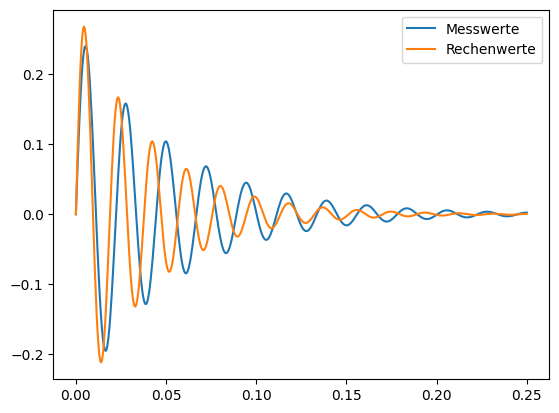

In [37]:
plt.plot(u_a["time"], u_a["measured"], label="Messwerte")
plt.plot(u_a["time"], u_a["calculated"], label='Rechenwerte')

plt.legend()
plt.show()